In [43]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
dataset=pd.read_csv("customer.csv")
dataset.drop("CustomerID", axis=1, inplace=True)

##pay attention!
dataset.drop(["Gender", "Age"], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
#dataset["Gender"]=le.fit_transform(dataset["Gender"])

scalers=[]
for item in dataset.columns:
    sc=StandardScaler()
    dataset[[item]]=sc.fit_transform(dataset[[item]])
    scalers.append(sc)

dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## visualization

In [89]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
dataset_2=pca.fit_transform(dataset)
dataset_2=pd.DataFrame(dataset_2, columns=["pc1", "pc2"])
dataset_2.head()

,pc1,pc2
0,-1.537109,-0.922207
1,-0.384168,-2.075149
2,-2.416002,0.010665
3,-0.466982,-1.938355
4,-1.455678,-0.895678


<Axes: xlabel='pc1', ylabel='pc2'>

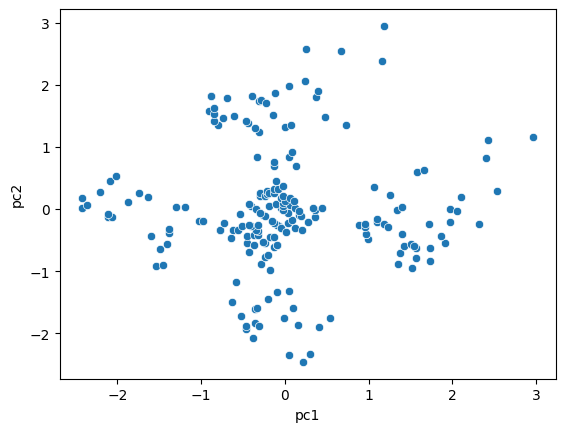

In [90]:
sns.scatterplot(dataset_2, x="pc1", y="pc2")

## K-means

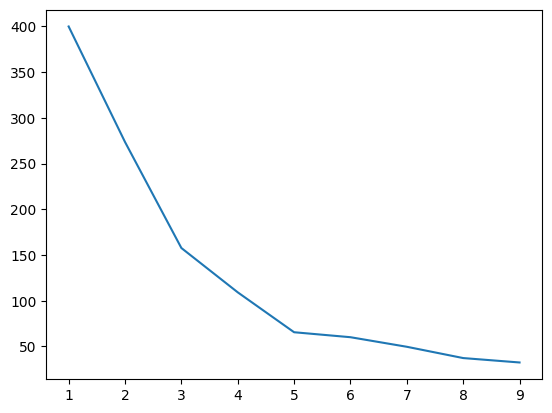

In [98]:
from sklearn.cluster import KMeans
tmp_list=[]

for i in range(1, 10):
    km=KMeans(n_clusters=i, init="k-means++", random_state=42)
    km.fit(dataset)
    tmp_list.append(km.inertia_)

plt.plot(range(1, 10), tmp_list)
#the pest n_cluster is 10

In [95]:
km=KMeans(n_clusters=5, init="k-means++", random_state=42)
km.fit(dataset)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [96]:
cluster_labels=km.labels_

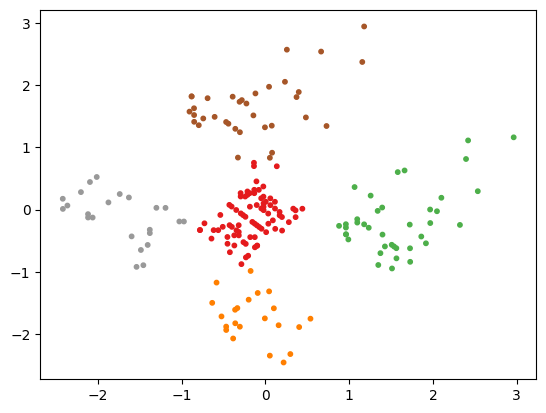

In [97]:
plt.scatter(dataset_2['pc1'], dataset_2['pc2'], c=cluster_labels, cmap='Set1', s=10)

## DBSCAN

In [107]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(dataset)

,eps,0.3
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


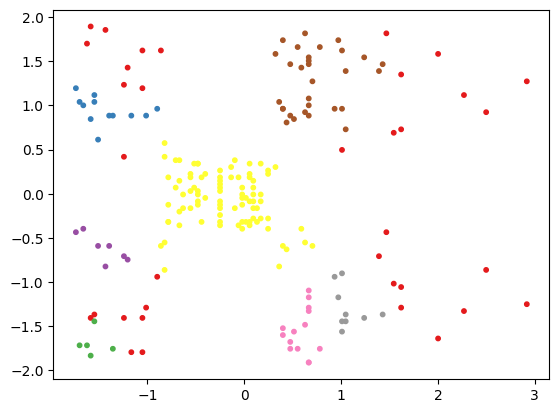

In [108]:
plt.scatter(dataset[dataset.columns[0]], dataset[dataset.columns[1]], 
            c=dbscan.labels_, cmap="Set1", s=10)